# Mobile Price Prediction

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Mobile phone price.csv')

In [5]:
df.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [6]:
df.shape

(407, 8)

In [7]:
df.size

3256

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [9]:
df.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


In [10]:
df.isnull().sum()

Brand                     0
Model                     0
Storage                   0
RAM                       0
Screen Size (inches)      0
Camera (MP)               0
Battery Capacity (mAh)    0
Price ($)                 0
dtype: int64

In [11]:
df.duplicated().sum()

26

In [12]:
df.nunique()

Brand                      16
Model                     239
Storage                    13
RAM                        20
Screen Size (inches)       41
Camera (MP)               143
Battery Capacity (mAh)     48
Price ($)                  89
dtype: int64

## Data Cleaning & Preprocessing

In [14]:
# Removing leading spaces and Replacing blank spaces with underscore

df.columns = df.columns.str.strip()  
df.columns = df.columns.str.replace(' ', '_') 
df['Model'] = df['Model'].str.strip().str.title()
df['Storage'] = df['Storage'].str.replace('GB', '').astype(int)
df['RAM'] = df['RAM'].str.replace('GB', '').astype(int)

In [15]:
# Extracting numiercal values from screen size and camera column

import re

df['Screen_Size_(inches)'] = df['Screen_Size_(inches)'].apply(
    lambda x: float(re.search(r'\d+\.*\d*', x).group()) if re.search(r'\d+\.*\d*', x) else None
)

df['Camera_(MP)'] = df['Camera_(MP)'].apply(
    lambda x: max([float(mp) for mp in re.findall(r'\d+\.*\d*', x)])
)

df['Price_($)'] = df['Price_($)'].apply(lambda x: int(re.sub('[^\d]', '', x)))

In [16]:
df.head()

,Brand,Model,Storage,RAM,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh),Price_($)
0,Apple,Iphone 13 Pro,128,6,6.10,12.0,3095,999
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108.0,5000,1199
2,OnePlus,9 Pro,128,8,6.70,50.0,4500,899
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64.0,5020,279
4,Google,Pixel 6,128,8,6.40,50.0,4614,799


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Model                   407 non-null    object 
 2   Storage                 407 non-null    int32  
 3   RAM                     407 non-null    int32  
 4   Screen_Size_(inches)    407 non-null    float64
 5   Camera_(MP)             407 non-null    float64
 6   Battery_Capacity_(mAh)  407 non-null    int64  
 7   Price_($)               407 non-null    int64  
dtypes: float64(2), int32(2), int64(2), object(2)
memory usage: 22.4+ KB


### Data Visualization

In [19]:
sns.set(style="darkgrid")

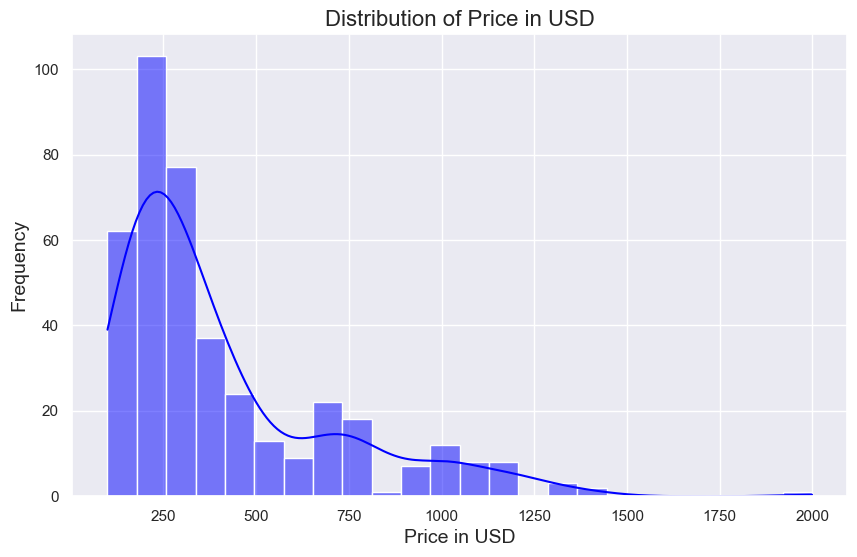

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_($)'], kde=True, color='blue')
plt.title('Distribution of Price in USD', fontsize=16)
plt.xlabel('Price in USD', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

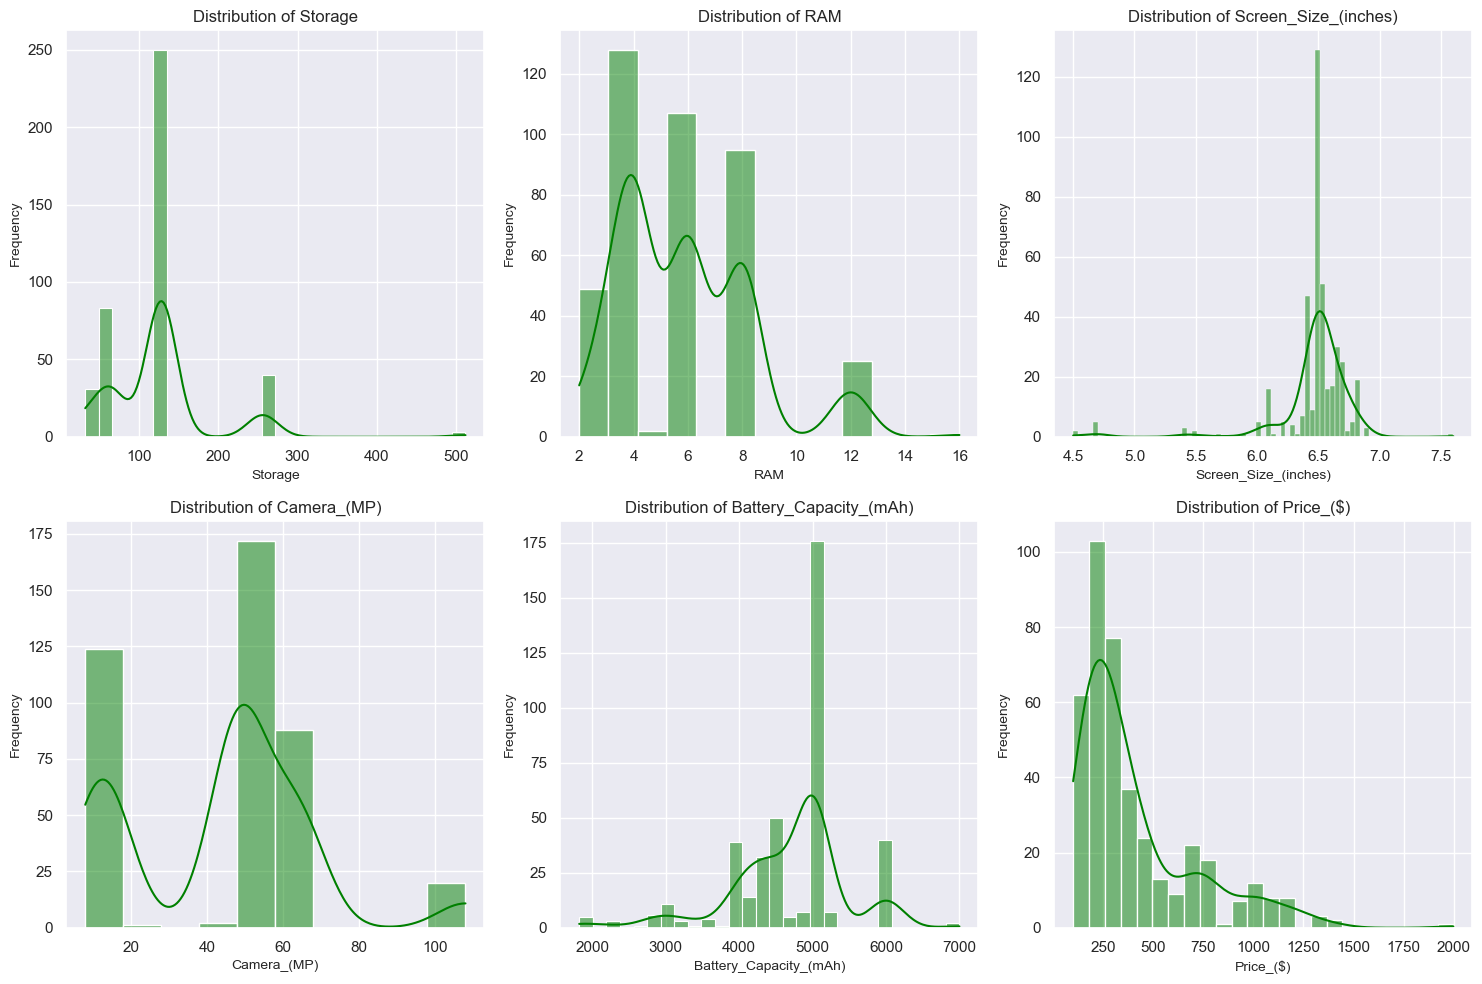

In [21]:
numerical_columns = ['Storage', 'RAM', 'Screen_Size_(inches)', 'Camera_(MP)', 'Battery_Capacity_(mAh)', 'Price_($)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='green')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)

plt.tight_layout()
plt.show()

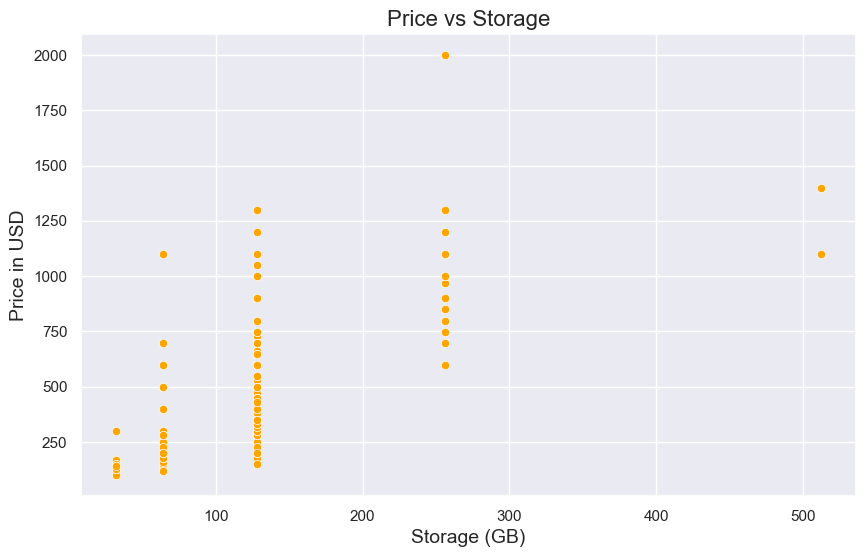

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Storage', y='Price_($)', data=df, color='orange')
plt.title('Price vs Storage', fontsize=16)
plt.xlabel('Storage (GB)', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.show()

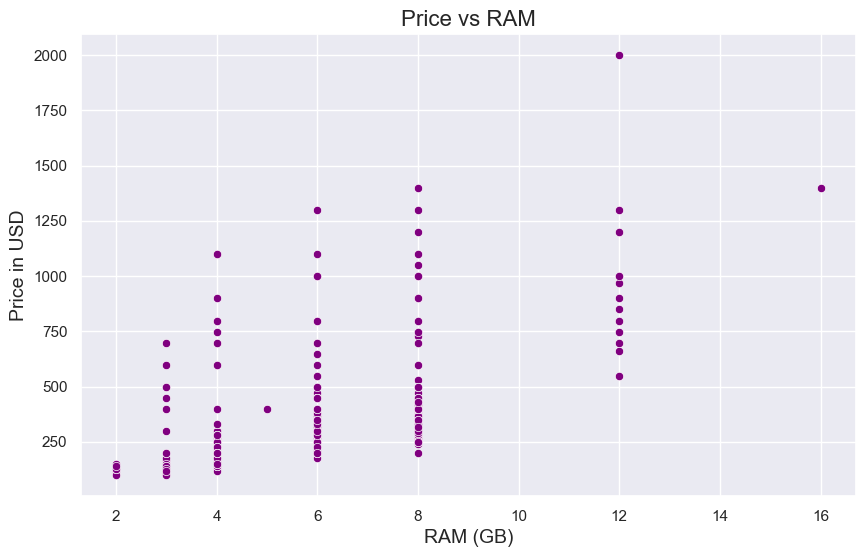

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Price_($)', data=df, color='purple')
plt.title('Price vs RAM', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.show()

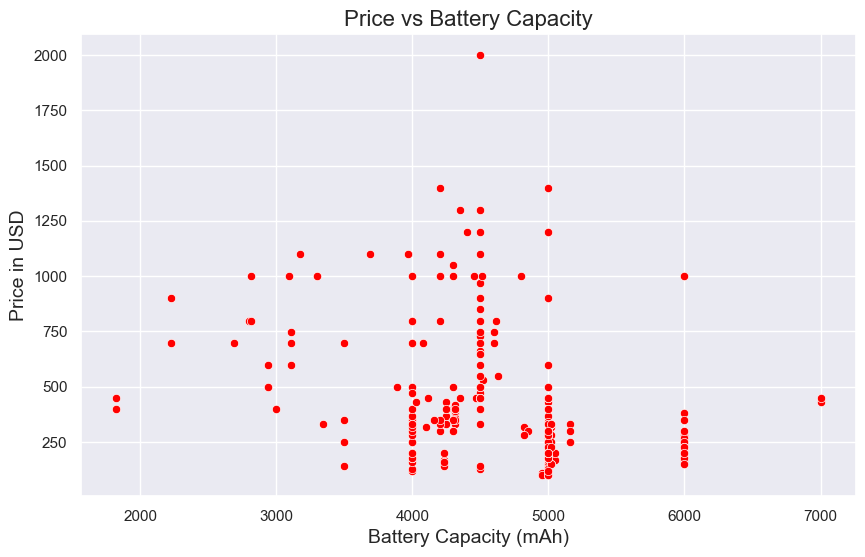

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Battery_Capacity_(mAh)', y='Price_($)', data=df, color='red')
plt.title('Price vs Battery Capacity', fontsize=16)
plt.xlabel('Battery Capacity (mAh)', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.show()

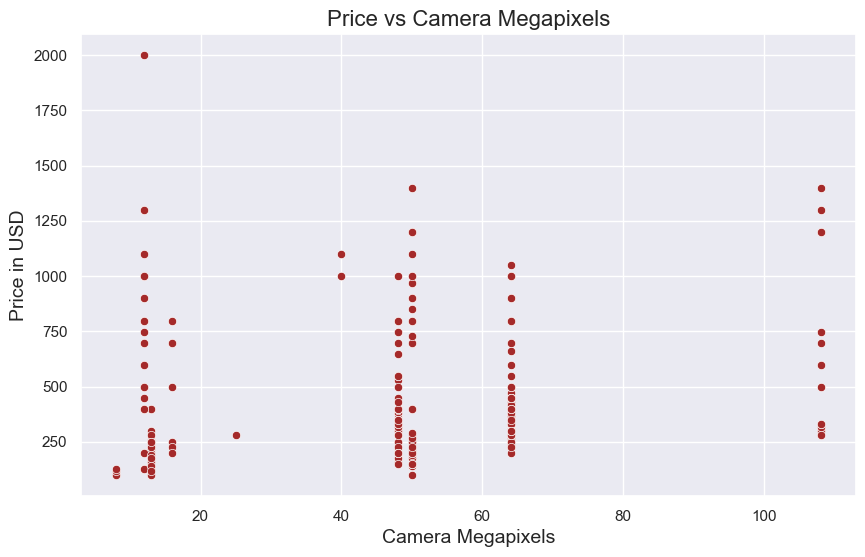

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Camera_(MP)', y='Price_($)', data=df, color='brown')
plt.title('Price vs Camera Megapixels', fontsize=16)
plt.xlabel('Camera Megapixels', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.show()

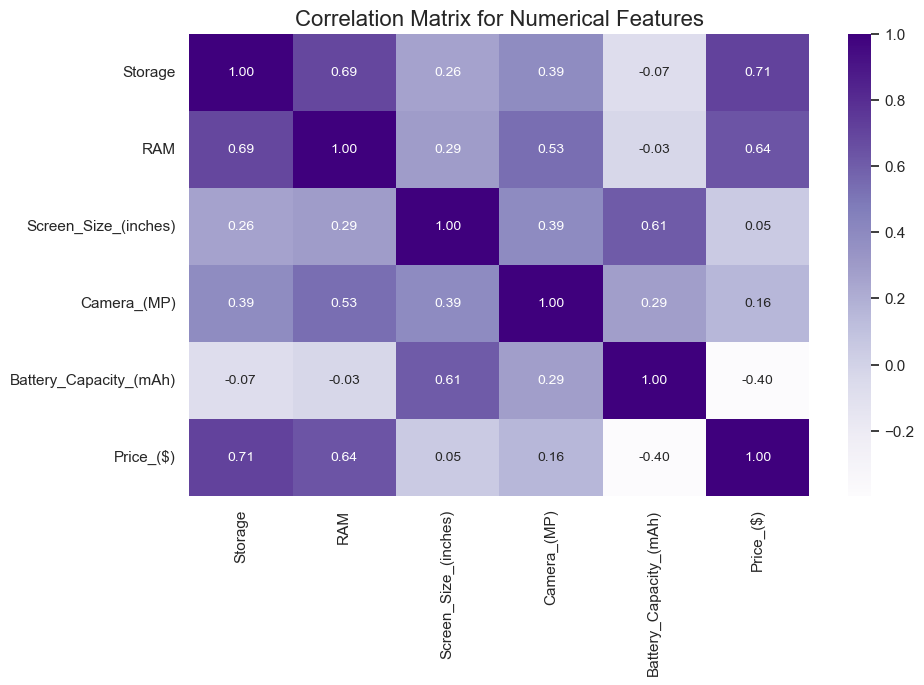

In [26]:
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', cbar=True, annot_kws={'size': 10})
plt.title('Correlation Matrix for Numerical Features', fontsize=16)
plt.show()

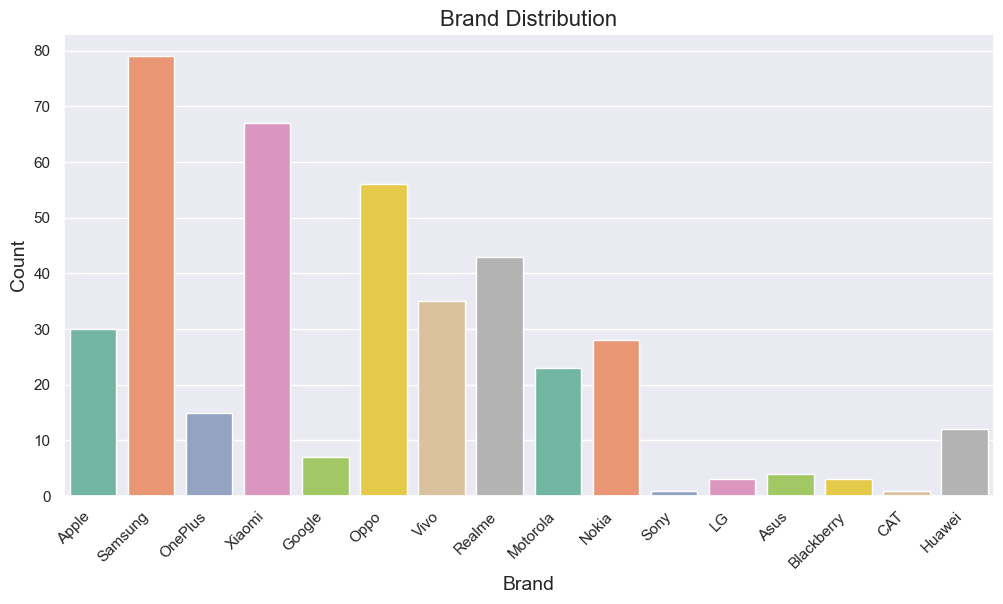

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Brand', data=df, palette='Set2')
plt.title('Brand Distribution', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

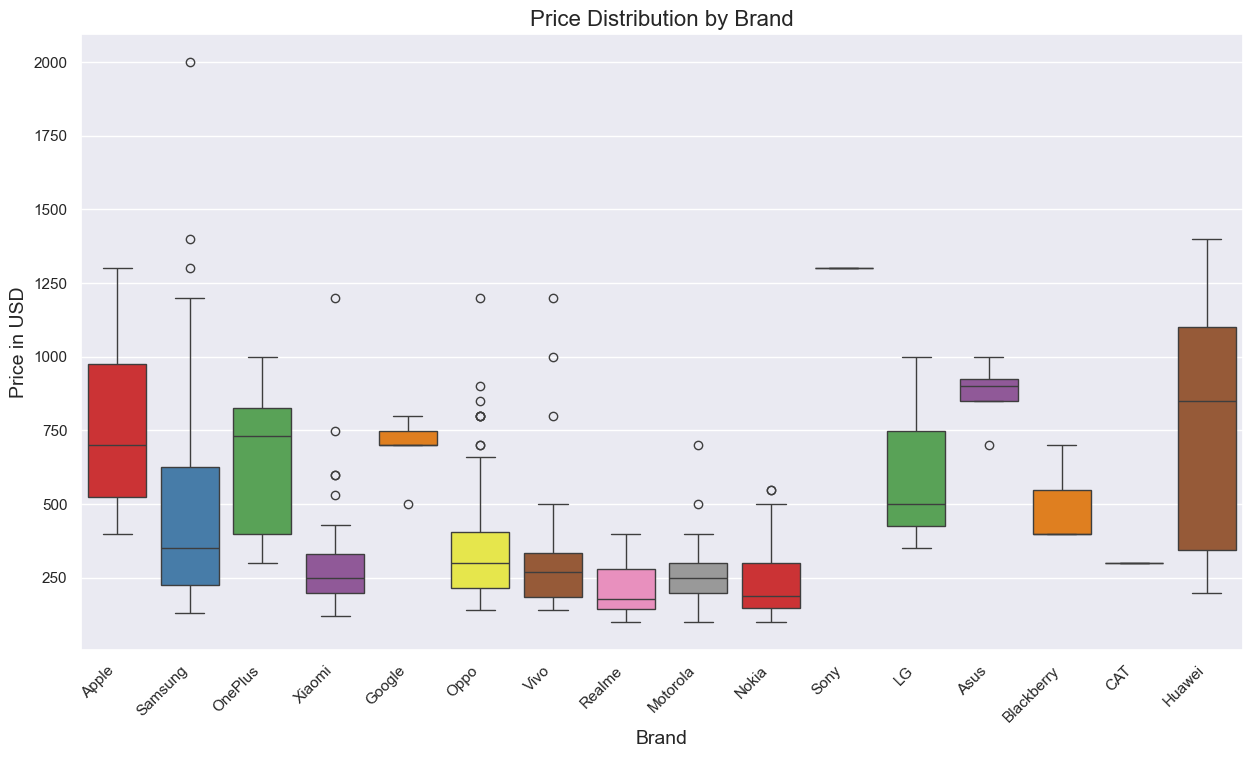

In [28]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Brand', y='Price_($)', data=df, palette='Set1')
plt.title('Price Distribution by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Price in USD', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

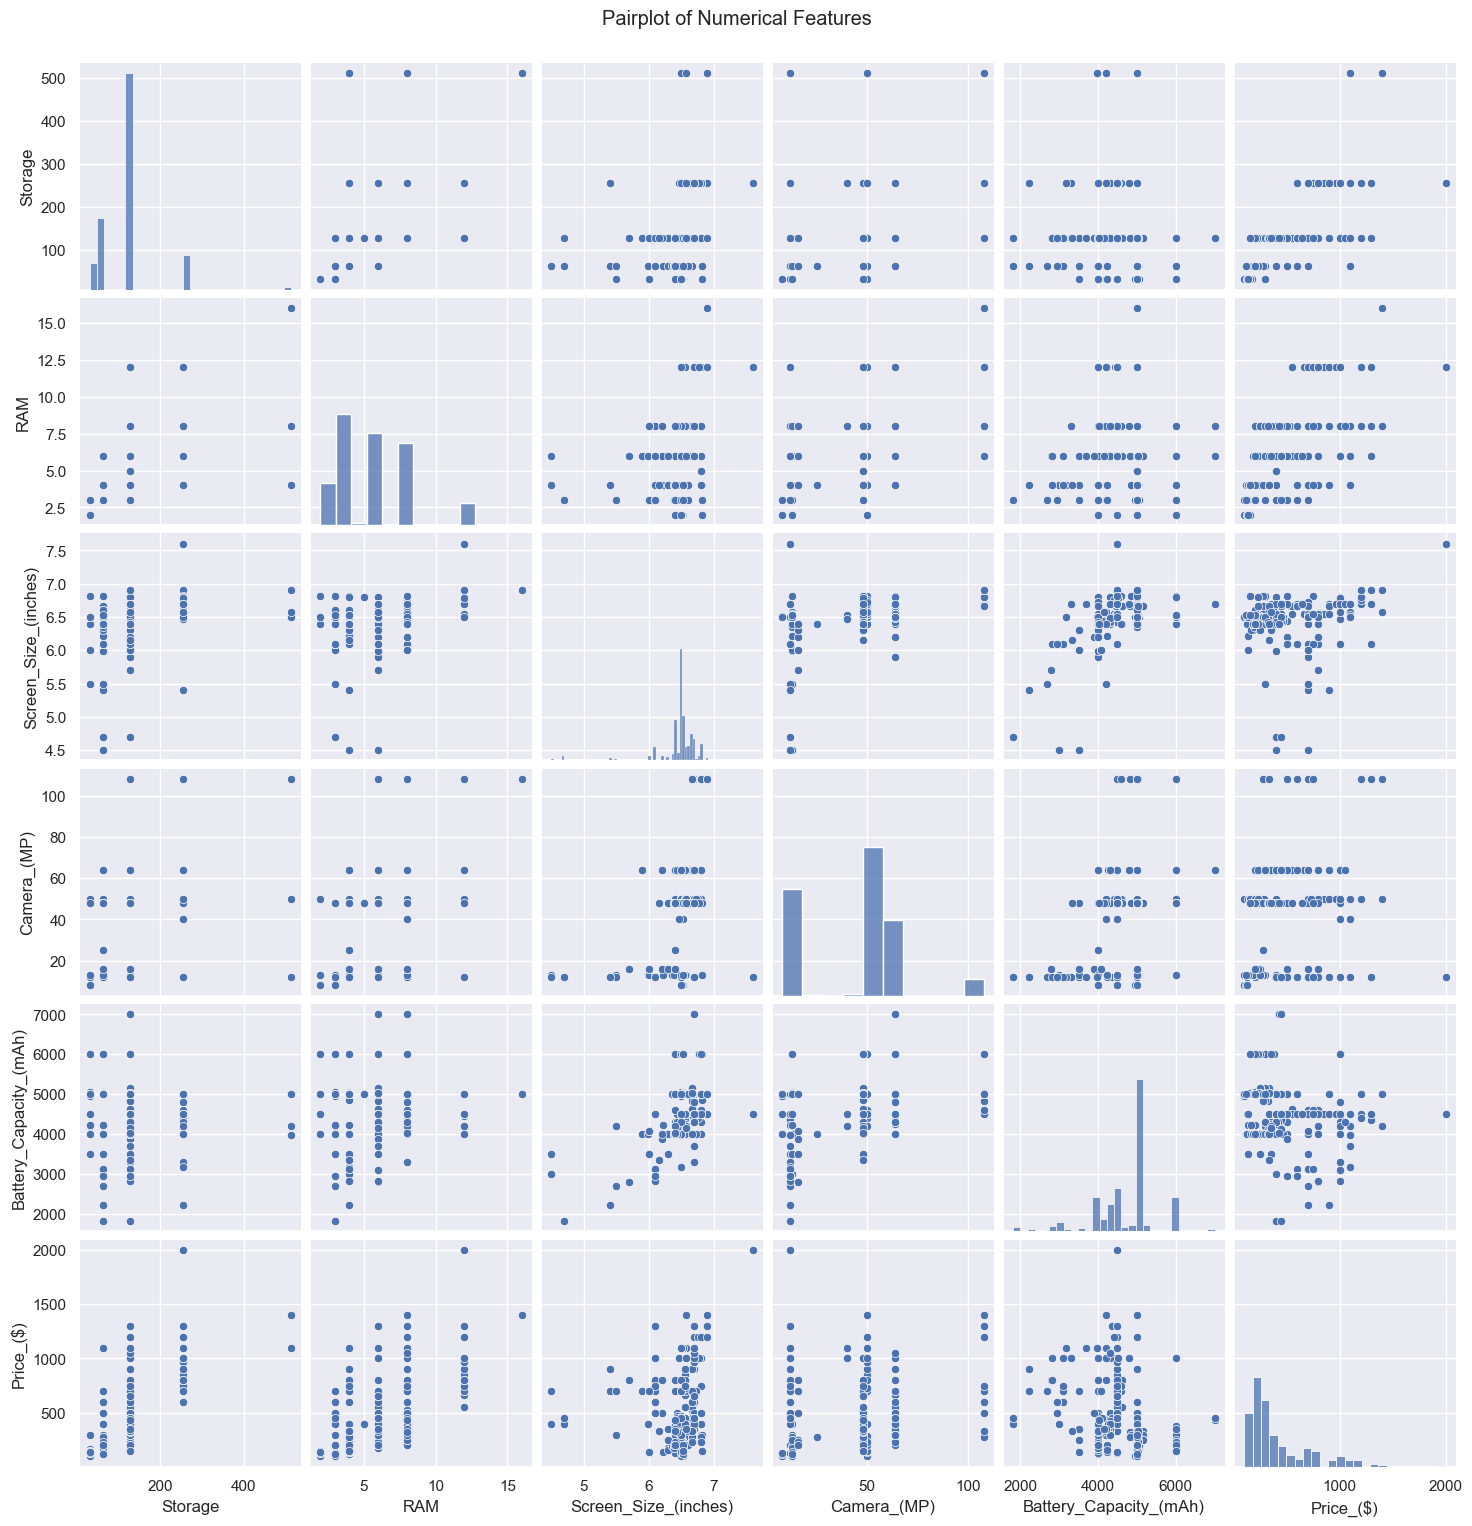

In [29]:
sns.pairplot(df[['Storage', 'RAM', 'Screen_Size_(inches)', 'Camera_(MP)', 'Battery_Capacity_(mAh)', 'Price_($)']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

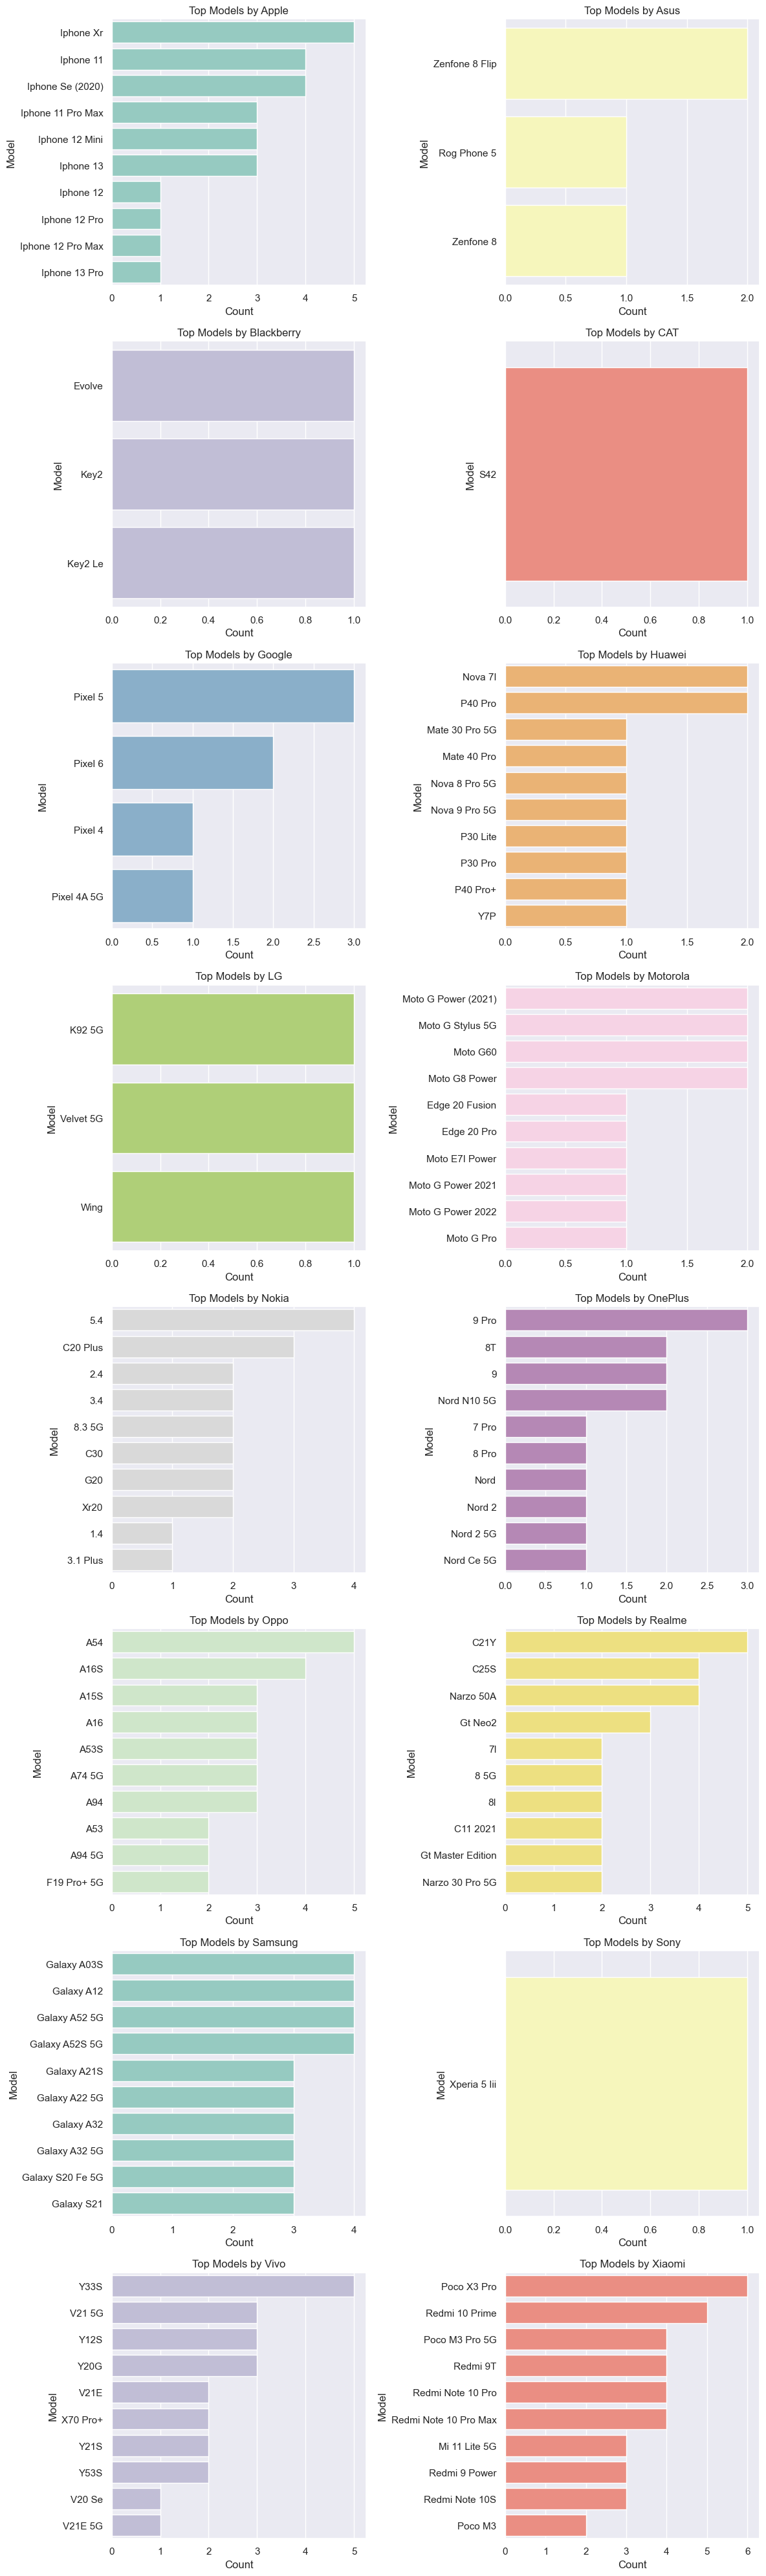

In [30]:
brand_model_counts = df.groupby(['Brand', 'Model']).size().reset_index(name='count')
brand_model_counts = brand_model_counts.sort_values(['Brand', 'count'], ascending=[True, False])
unique_brands = brand_model_counts['Brand'].unique()
num_rows = (len(unique_brands) + 1) // 2  
num_cols = 2
palette = sns.color_palette("Set3", len(unique_brands))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 5))
axes = axes.flatten()
for i, brand in enumerate(unique_brands):
    ax = axes[i]
    
    brand_data = brand_model_counts[brand_model_counts['Brand'] == brand].head(10)
    
    sns.barplot(
        x='count', y='Model', data=brand_data, ax=ax, 
        palette=[palette[i % len(palette)]]
    )
    ax.set_title(f"Top Models by {brand}")
    ax.set_xlabel('Count')
    ax.set_ylabel('Model')

plt.tight_layout()
plt.show()

In [31]:
# One Hot Encoding to convert categorical data to numerical data

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [32]:
df.head(1)

,Storage,RAM,Screen_Size_(inches),Camera_(MP),Battery_Capacity_(mAh),Price_($),Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,...,Model_Y21S,Model_Y31S,Model_Y33,Model_Y33S,Model_Y51A,Model_Y53S,Model_Y72 5G,Model_Y7P,Model_Zenfone 8,Model_Zenfone 8 Flip
0,128,6,6.1,12.0,3095,999,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
# Removing Outliers 

numeric_columns = ['Storage', 'RAM', 'Screen_Size_(inches)', 'Camera_(MP)', 'Battery_Capacity_(mAh)', 'Price_($)']
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop("Price_($)", axis=1)
y = df["Price_($)"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [37]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [38]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [39]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.7691539842804613,
 0.8883512020111084,
 0.8595981802744487,
 0.7966149262931278,
 0.8599068771900317,
 0.865509276524028]

## Model Evaluation

In [41]:
Xgmodel = XGBoost.fit(X_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,XGBoost.predict(X_test)))

The R2 score of Random Forest :  0.8883512020111084


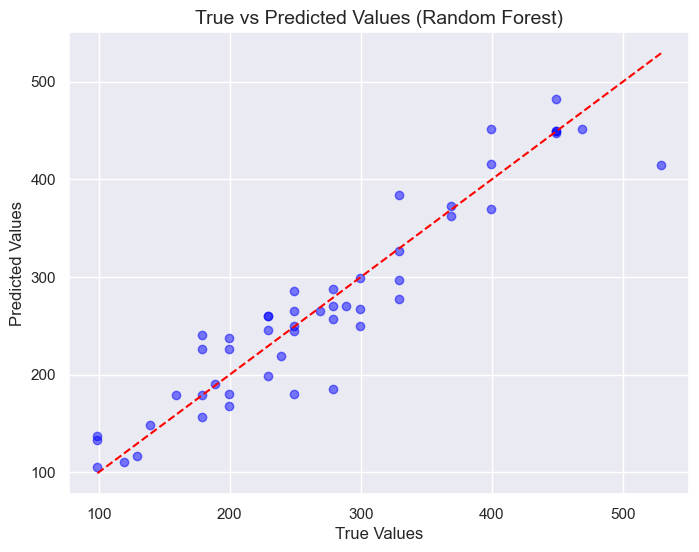

In [42]:
y_pred = XGBoost.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.title('True vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()